In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display


In [19]:
df = pd.read_csv("DelayedFlights.csv",sep=",")



## Visualització  de variables categoriques

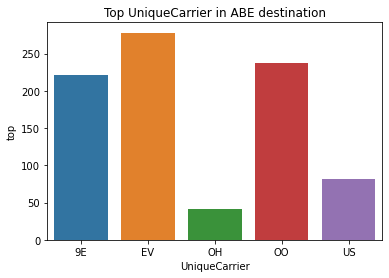

In [28]:
def topUniqueCarriers():
    #Agrupem per desitnació i aerolinia
    destinations = df.groupby(['Dest','UniqueCarrier'])
#reagrupem per les aerolinies fet el count  per obternir la destianció més transitada
    topdestinations =destinations['UniqueCarrier'].count().reset_index(name='top')
    topdestinations = topdestinations.head()
#Fem el plot de les aerolinies i el nombre de cops que han transitat per ABE com a destinació
    sns.barplot(x ='UniqueCarrier',y='top',data=topdestinations).set_title('Top UniqueCarrier in ABE destination')
topUniqueCarriers()



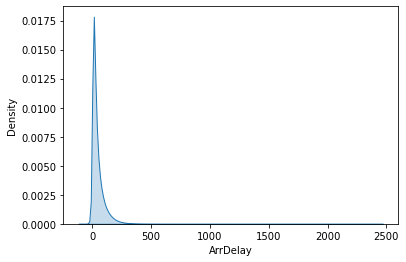

In [29]:
def totalDensityArrDelay():
    #plot de la densitat  total de tots els arrDelays
    sns.kdeplot(df['ArrDelay'],shade=True)
totalDensityArrDelay()



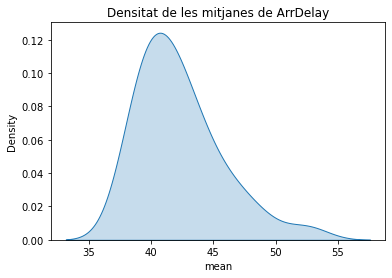

In [30]:
def meansOfArrDelays():
    #Agrupem la base de dades per els dies del mes dels quals farem la mitja
    delay = df.groupby(['DayofMonth'])['ArrDelay'].mean().reset_index(name='mean')
# Fem el plot de la densitat de les mitjes
    sns.kdeplot(delay['mean'],shade = True).set_title('Densitat de les mitjanes de ArrDelay')
meansOfArrDelays()


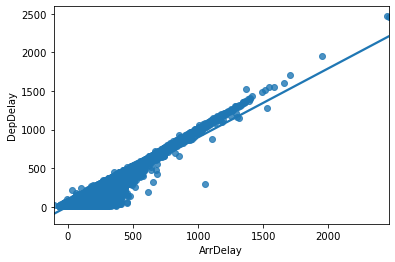

In [31]:
def correlation_Delays():
    
    #Volquem les columnes ArrDelay i DepDelay a una variable
    inOutDelay = df[['ArrDelay','DepDelay']]
    #Fem el plot  de la coorrelació d'aquestes dues variables on l'eix x es ArrDelay i leix y DepDelay
    sns.regplot(x=inOutDelay['ArrDelay'],y=inOutDelay['DepDelay'])
correlation_Delays()

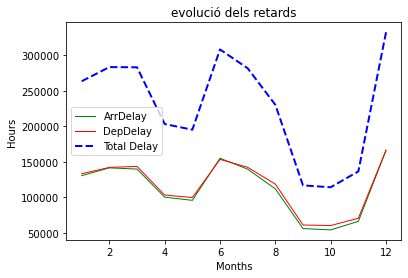

In [32]:
def evol_delays():
    #Volquem les tres columnes a una nova variable pd
    select = df[['Month','ArrDelay','DepDelay']]
    #Agupem en 'total una  agrupació per mes on fem la suma  de Arrdelay i DepDelay i ho dividim entre 60 per obtenir les hores'
    total = select.groupby('Month',).agg({'Month':lambda x: x.unique(),'ArrDelay':lambda x: x.sum()/60,
                                        'DepDelay':lambda x: x.sum()/60,
                                       })
    total['totalDelay']=total['ArrDelay']+total['DepDelay']
    #Fem el plot per veure l'evolució al llarg dels mesos de Arrdelay DestDelay i la suma de les dos
    fig, ax = plt.subplots()
    ax.set_xlabel('Months')
    ax.set_ylabel('Hours')
    ax.set_title('evolució dels retards')

    plt.plot( 'Month', 'ArrDelay', data=total, marker='', markerfacecolor='green', markersize=1, color='green', linewidth=1)
    plt.plot( 'Month', 'DepDelay', data=total, marker='', color='red', linewidth=1)
    plt.plot( 'Month', 'totalDelay', data=total, marker='', color='blue', linewidth=2, linestyle='dashed', label="Total Delay")
    plt.legend()
evol_delays()



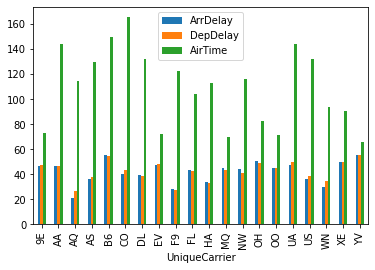

In [33]:
def means_byCarrier():
    
    #Volquen en 'carriers' una agrupació per aerolinies on farem les mitjes de ArrDelay,DepDelay i AirTime
    carriers = df.groupby('UniqueCarrier').agg({'ArrDelay':(lambda x: x.mean(),),
                                                 'DepDelay':(lambda x: x.mean(),),
                                                 'AirTime':(lambda x: x.mean(),)})
    carriers.rename(columns={"ArrDelay": "AvgArrDelay", "DepDelay": "AvgDepDelay","AirTime":"AvgAirTime"})
    #Fem un droplevel per quedar-nos amb les noves etiquetes
    carriers.columns =carriers.columns.droplevel(1)
    carriers
    carriers.plot.bar()
means_byCarrier()